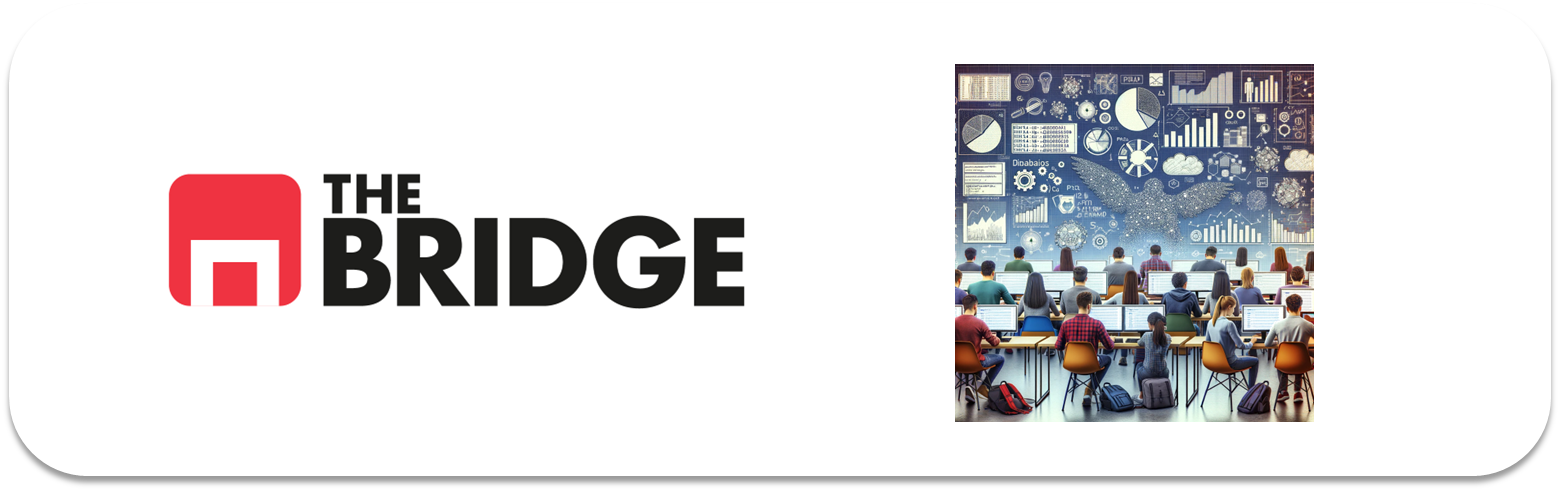

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv('data/hard_to_find/obligatoria_hard.csv', sep="|" )
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


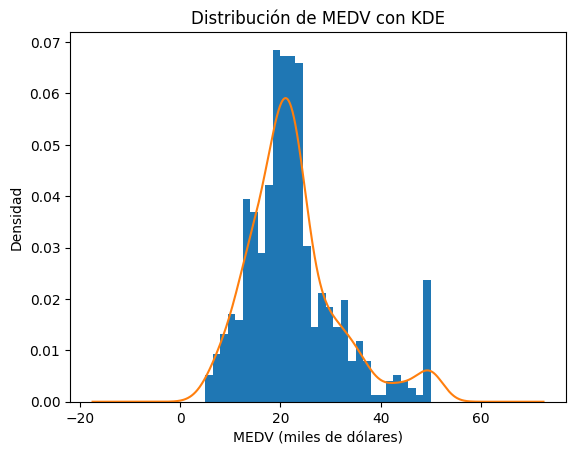

In [3]:
# La variable target deberia de ser MEDV, ya que es el valor medio de las viviendas ocupadas y lo que se busca es predecir la mediana del precio de las casas.

plt.figure()
plt.hist(df["MEDV"], bins=30, density=True)
df["MEDV"].plot(kind="kde")

plt.xlabel("MEDV (miles de dólares)")
plt.ylabel("Densidad")
plt.title("Distribución de MEDV con KDE")

plt.show()

In [4]:
# Split y train test
from sklearn.model_selection import train_test_split

# Separo los features y el target. x = features /  y = target
X = df.drop(columns="MEDV")
y = df["MEDV"]

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# Comprobación rápida
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Parejas 
train_set = (X_train, y_train)
test_set  = (X_test, y_test)
# Comprobación
print("Train X:", train_set[0].shape, "Train y:", train_set[1].shape)
print("Test  X:", test_set[0].shape, "Test  y:", test_set[1].shape)

(506, 12)
(404, 12)
(102, 12)
(404,)
(102,)
Train X: (404, 12) Train y: (404,)
Test  X: (102, 12) Test  y: (102,)


In [5]:
df.corr(numeric_only= True)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


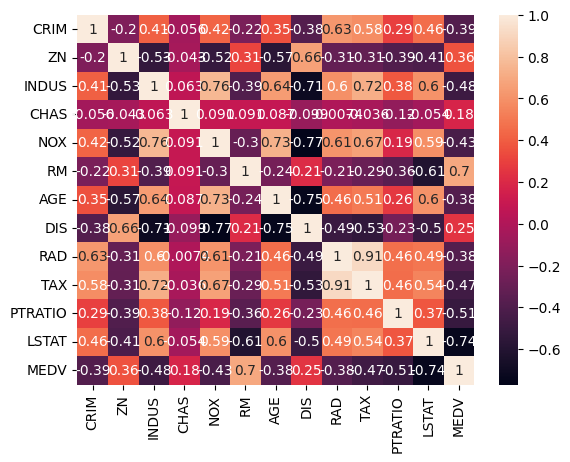

In [6]:
sns.heatmap(df.corr(numeric_only = True),annot=True);
plt.show();

Me quedo con  
RM -> Relación directa y fuerte con el precio  
LSTAT -> Relación negativa muy clara con el precio y resume entorno socioeconómico  
NOX -> Impacto negativo en calidad de vida  
PTRATIO -> Influye mucho en la valoración de zonas residenciales (Con esta tengo mis dudas)  
DIS -> Afecta a accesibilidad. Relación no perfecta pero informativa   
CHAS  (Con esta tambien tengo mis dudas.)


Descarto  
RAD, TAX -> redundantes  
CRIM -> parcialmente capturado por LSTAT  
ZN, INDUS, AGE -> baja correlación directa  

In [7]:
features = ["RM", "LSTAT", "NOX", "PTRATIO", "DIS", "INDUS", "AGE", "TAX", "CRIM"]

X_train_sel = X_train[features]
X_test_sel  = X_test[features]

In [10]:
criterio_col = 0.7
excluidas = []
corr_numeric = train_set[features].corr(numeric_only = True)

for col in features:
    print(f"Comprobando colinealidad de {col}")
    if col not in excluidas:
        for col_2, valor_corr in corr_numeric[col].items():
            print(f"\tComprobando {col} con {col_2}")
            if col != col_2 and col_2 in features:
                if np.abs(valor_corr) >= criterio_col:
                    print(f"\t\t--> {col} correla con {col_2} al {valor_corr:0.4f}, EXCLUIMOS {col_2} <--")
                    excluidas.append(col_2)
                else:
                    print(f"\t\t{col} correla con {col_2} al {valor_corr:0.4f}, mantenemos {col_2}")
            elif col == col_2:
                print("\t\tSon la misma variable, no comprobamos")
    
    elif col in excluidas:
        print(f"\tLa columna {col} ya ha sido excluida")

excluidas = list(set(excluidas))
print("\nLas variables a excluir son", excluidas)

TypeError: tuple indices must be integers or slices, not list

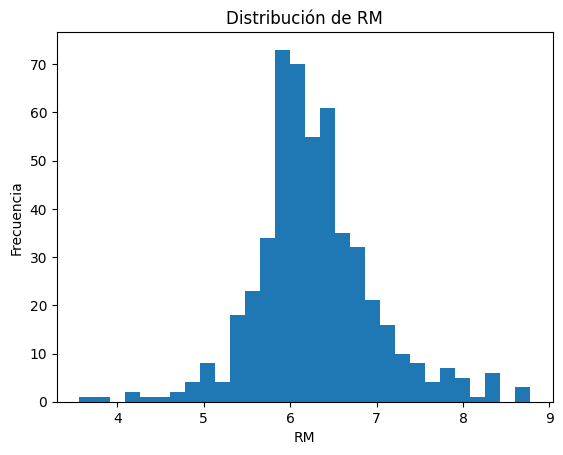

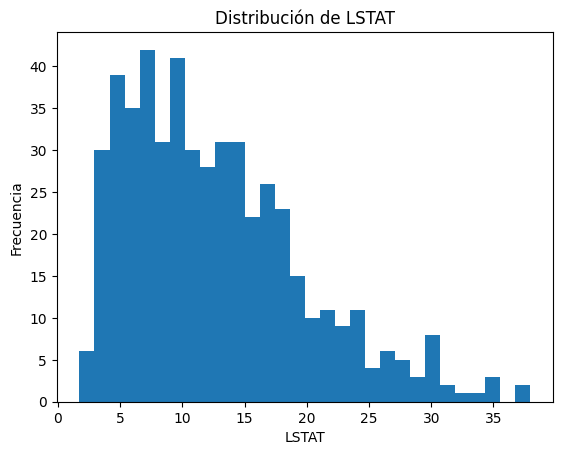

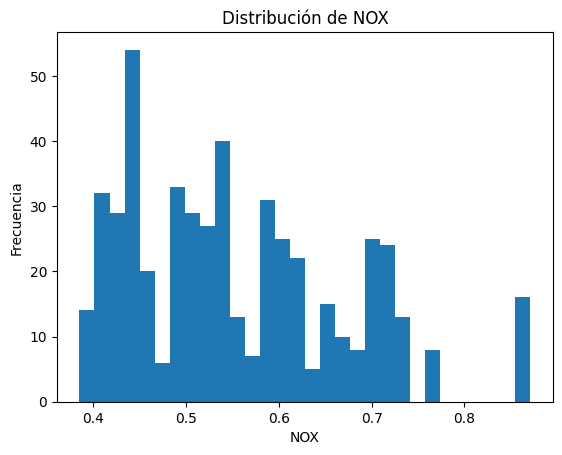

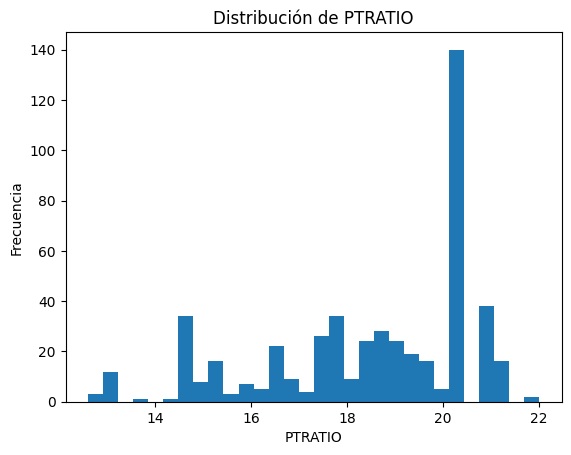

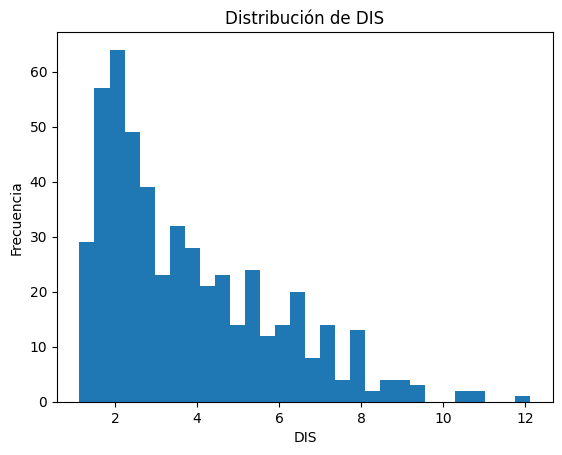

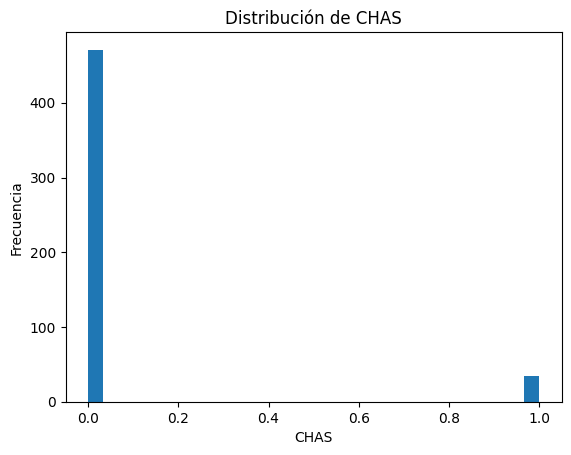

In [ ]:
import matplotlib.pyplot as plt

features = ["RM", "LSTAT", "NOX", "PTRATIO", "DIS", "CHAS"]

for col in features:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

X_train_proc = X_train_sel.copy()
X_test_proc  = X_test_sel.copy()

# Transformaciones logarítmicas
for col in ["LSTAT", "DIS"]:
    X_train_proc[col] = np.log(X_train_proc[col])
    X_test_proc[col]  = np.log(X_test_proc[col])

# Escalado (excepto CHAS)
num_features = ["RM", "LSTAT", "NOX", "PTRATIO", "DIS"]

scaler = StandardScaler()

X_train_proc[num_features] = scaler.fit_transform(X_train_proc[num_features])
X_test_proc[num_features]  = scaler.transform(X_test_proc[num_features])

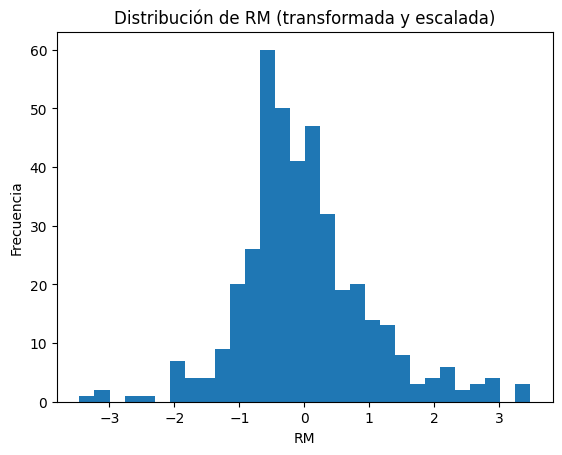

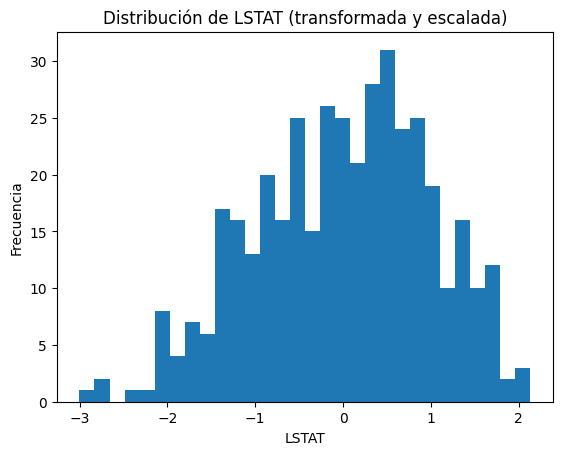

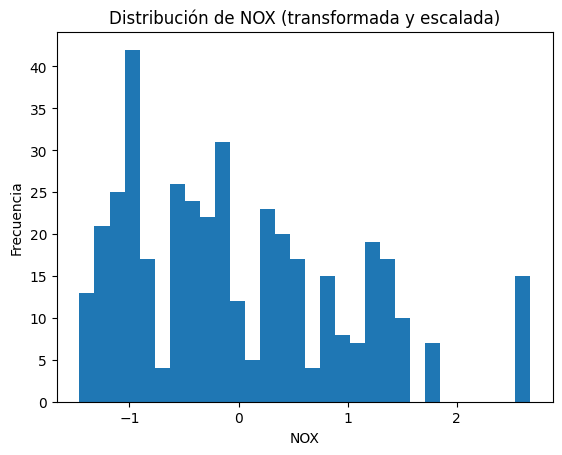

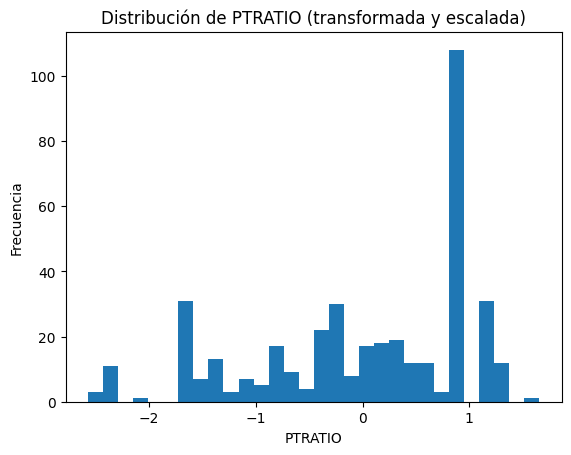

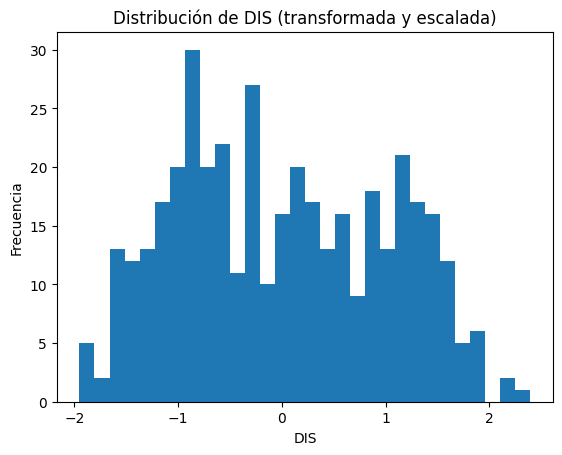

In [29]:
num_features = ["RM", "LSTAT", "NOX", "PTRATIO", "DIS"]

for col in num_features:
    plt.figure()
    plt.hist(X_train_proc[col], bins=30)
    plt.title(f"Distribución de {col} (transformada y escalada)")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

In [ ]:
# Creamos el modelo de regresión lineal 
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [31]:
# Entrenamos con los datos de train
lm.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [36]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
#baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr.predict(X_test)))

Train MSE: 22.60428647941742
Test MSE: 22.777708563865886


In [32]:
lm.intercept_

np.float64(36.97046906702997)

In [33]:
lm.coef_

array([-1.27195928e-01,  3.07954889e-02,  2.52477064e-02,  3.04947682e+00,
       -1.81832461e+01,  4.24009781e+00, -3.59439826e-03, -1.46550703e+00,
        2.39990397e-01, -1.12752436e-02, -8.94844726e-01, -5.37770202e-01])

In [34]:
coef_df = pd.DataFrame(lm.coef_, X.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
CRIM,-0.127196
ZN,0.030795
INDUS,0.025248
CHAS,3.049477
NOX,-18.183246
RM,4.240098
AGE,-0.003594
DIS,-1.465507
RAD,0.239990
TAX,-0.011275


NOX -> -18,18 -> Cuanta más contaminacion, menos es el precio.  
RM -> +4,24 -> Cuantas más habitaciones, más es el precio.  
CHAS -> +3,05 -> Cerca del rio, sube el precio.  
DIS -> -1,47 -> Más lejos del centro, baja el precio.   
PTRATIO -> -0,89 -> Peor ratio alumons/profesor, baja el precio.  
LSTAT -> -0,54 -> Cuanta mayor sea la población desafovrecida, más baja el precio.  

In [40]:
from sklearn import metrics

In [42]:
# Train error 
pred_train = lm.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lm.score(X_train,y_train))

MAE train 3.4244687759495283
MSE train 22.60428647941742
RMSE train 4.754396542087904
R2 train 0.739801993681731


In [43]:
# Test error 
print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lm.score(X_test,y_test))

MAE test 3.111377388238152
MSE test 22.777708563865886
RMSE test 4.7725997699226665
R2 test 0.6893967884614781


In [48]:
# Regresión Ridge

from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 22.6
Test MSE sin regularización: 22.78
Train MSE: 23.49
Test MSE: 23.29


In [52]:
# Regresión Lasso 
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.01)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 22.6
Test MSE sin regularización: 22.78
Train MSE: 22.6410
Test MSE: 22.7904
